In [17]:
import cv2

In [ ]:
###below is the code to check all extension present inside folder

In [27]:
#different extension of image for particular folder
import os
from pathlib import Path

def get_image_extensions(folder_path):
    # Common image extensions
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'}
    
    # Set to store unique extensions found
    found_extensions = set()
    
    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        # Get the file extension
        ext = Path(filename).suffix.lower()
        
        # If it's an image extension, add it to the set
        # if ext in image_extensions:
        found_extensions.add(ext)
    
    return found_extensions

# Example usage
folder_path = "C:\\dataset\\shoeTypeClassifierDataset\\training\\soccer_shoes"
extensions = get_image_extensions(folder_path)

print("Image extensions found in the folder:")
for ext in extensions:
    print(ext)

Image extensions found in the folder:
.jpg
.gif
.jpeg
.png


In [ ]:
###below is the code to check all extension present inside all classes


In [22]:
#different extension of image availabe in all folders

import os
from collections import defaultdict

def get_image_extensions(root_folder):
    image_extensions = defaultdict(set)
    
    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)
        
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                _, extension = os.path.splitext(file_name)
                if extension:  # Ignore files without extensions
                    image_extensions[folder_name].add(extension.lower())
    
    # Convert sets to lists for the final dictionary
    return {k: list(v) for k, v in image_extensions.items()}

# Usage
root_folder = r"C:\\dataset\\shoeTypeClassifierDataset\\training"
result = get_image_extensions(root_folder)

# Print the result
for folder, extensions in result.items():
    print(f"{folder}: {extensions}")

boots: ['.jpg', '.jpeg', '.png']
flip_flops: ['.jpg', '.jpeg', '.png']
loafers: ['.jpg', '.jpeg', '.png']
sandals: ['.jpg', '.jpeg', '.png']
sneakers: ['.jpg']
soccer_shoes: ['.jpg', '.gif', '.jpeg', '.png']


In [30]:
#reading image using PIL
from PIL import Image

try:
    with Image.open("C:\\dataset\\shoeTypeClassifierDataset\\training\\soccer_shoes\\image30.gif") as img:
        print("Image opened successfully")
        print(f"Format: {img.format}")
        print(f"Mode: {img.mode}")
        print(f"Size: {img.size}")
except IOError:
    print("Unable to open the image")

Image opened successfully
Format: GIF
Mode: P
Size: (620, 513)


In [35]:
# Reading alll images using PIL
import os
from PIL import Image

def process_images(root_folder):
    # Iterate through all subdirectories
    for class_folder in os.listdir(root_folder):
        class_path = os.path.join(root_folder, class_folder)
        
        # Check if it's a directory
        if os.path.isdir(class_path):
            print(f"Processing class: {class_folder}")
            
            # Iterate through all files in the class folder
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                
                # Check if it's a file
                if os.path.isfile(image_path):
                    try:
                        with Image.open(image_path) as img:
                            continue
                            # Successfully opened the image
                            # print(f"  Processed: {image_path}")
                            # print(f"    Format: {img.format}, Mode: {img.mode}, Size: {img.size}")
                    except Exception as e:
                        # Failed to open the image
                        print(f"  Error processing: {image_path}")
                        print(f"    Error: {str(e)}")

# Your root folder
root_folder =r"C:\\dataset\\shoeTypeClassifierDataset\\training"

# Process all images
process_images(root_folder)

Processing class: boots
Processing class: flip_flops
Processing class: loafers
Processing class: sandals
Processing class: sneakers
Processing class: soccer_shoes


In [ ]:
### code to determine different color spaces present in all classes

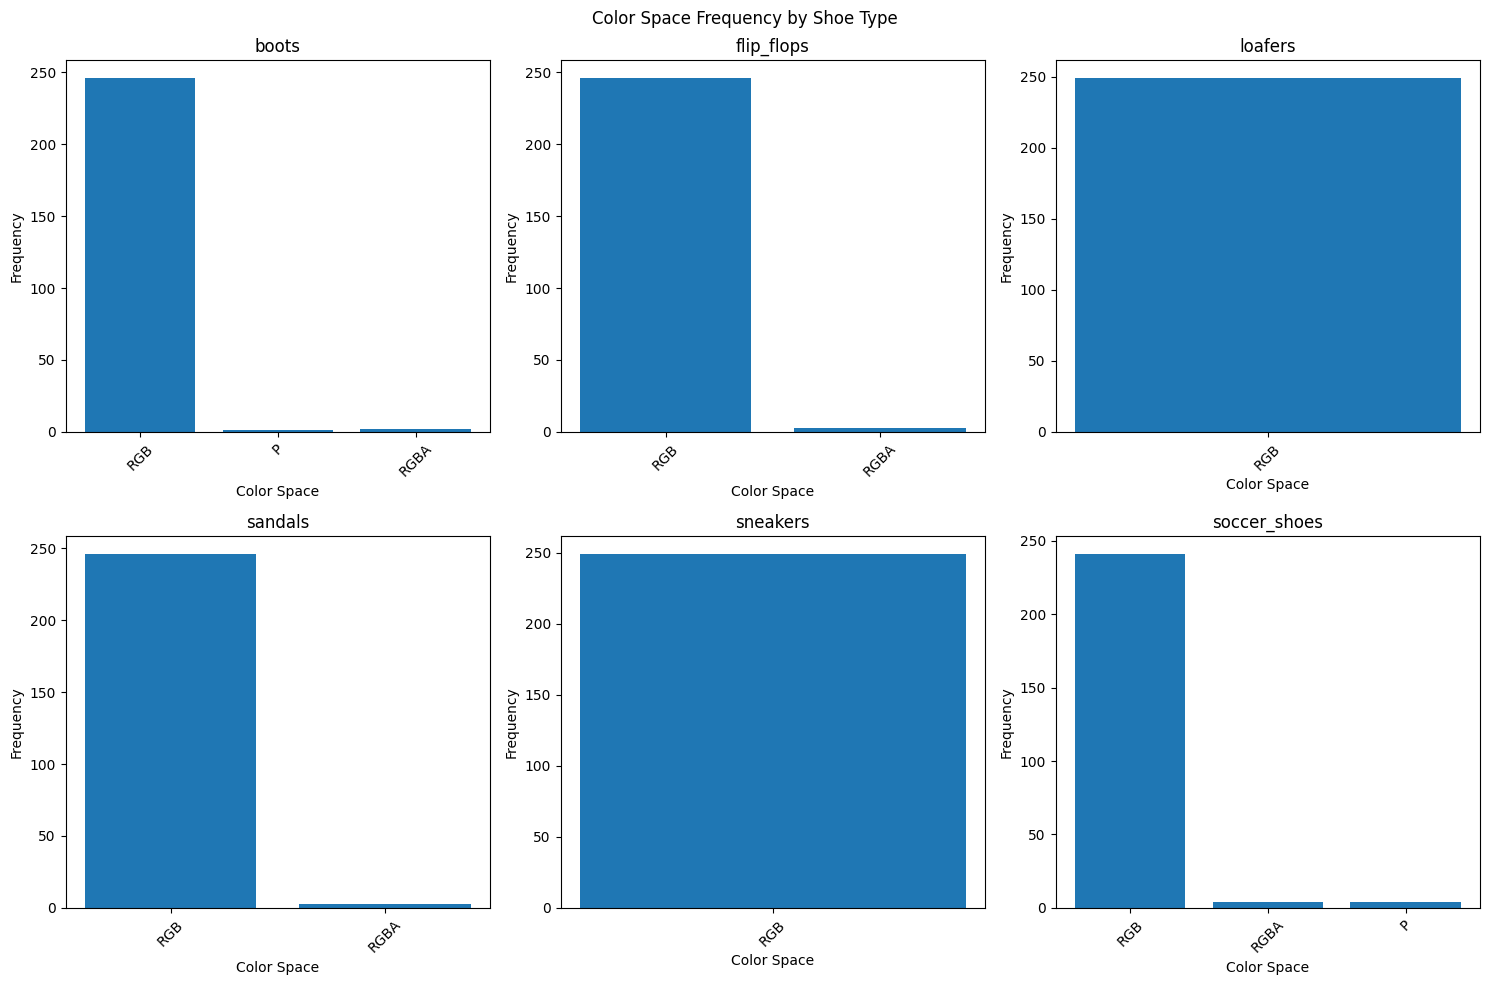

In [43]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

# Path to the main folder
main_folder = r"C:\\dataset\\shoeTypeClassifierDataset\\training"

# Get all subfolders (classes)
class_folders = [f for f in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, f))]

# Dictionary to store color space frequencies for each class
class_color_spaces = {folder: Counter() for folder in class_folders}

# Analyze images in each class folder
for class_folder in class_folders:
    folder_path = os.path.join(main_folder, class_folder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            with Image.open(file_path) as img:
                class_color_spaces[class_folder][img.mode] += 1
        except (IOError, OSError):
            # This file is not an image or cannot be opened by PIL
            continue
        except Exception as e:
            print(f"Error processing {filename} in {class_folder}: {e}")

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Color Space Frequency by Shoe Type')

for i, (class_name, color_space_freq) in enumerate(class_color_spaces.items()):
    ax = axs[i // 3, i % 3]
    
    color_spaces = list(color_space_freq.keys())
    frequencies = list(color_space_freq.values())
    
    ax.bar(color_spaces, frequencies)
    ax.set_title(class_name)
    ax.set_xlabel('Color Space')
    ax.set_ylabel('Frequency')
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
##data analysis for all class like what is avg size, color spaces, file format, pixel sats

In [38]:
import os
from PIL import Image
import numpy as np
from collections import defaultdict

def analyze_images(root_folder):
    class_stats = defaultdict(lambda: {
        'count': 0,
        'sizes': [],
        'modes': defaultdict(int),
        'formats': defaultdict(int),
        'aspect_ratios': [],
        'file_sizes': [],
        'pixel_means': defaultdict(list),
        'pixel_stds': defaultdict(list)
    })

    for class_folder in os.listdir(root_folder):
        class_path = os.path.join(root_folder, class_folder)
        if os.path.isdir(class_path):
            print(f"Processing class: {class_folder}")
            
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                if os.path.isfile(image_path):
                    try:
                        with Image.open(image_path) as img:
                            stats = class_stats[class_folder]
                            stats['count'] += 1
                            stats['sizes'].append(img.size)
                            stats['modes'][img.mode] += 1
                            stats['formats'][img.format] += 1
                            stats['aspect_ratios'].append(img.width / img.height)
                            stats['file_sizes'].append(os.path.getsize(image_path) / 1024)  # Size in KB
                            
                            # Convert image to numpy array for pixel statistics
                            img_array = np.array(img)
                            if len(img_array.shape) == 3:
                                channels = img_array.shape[2]
                                stats['pixel_means'][channels].append(np.mean(img_array, axis=(0,1)))
                                stats['pixel_stds'][channels].append(np.std(img_array, axis=(0,1)))
                            else:
                                stats['pixel_means'][1].append(np.mean(img_array))
                                stats['pixel_stds'][1].append(np.std(img_array))
                            
                    except Exception as e:
                        print(f"  Error processing: {image_path}")
                        print(f"    Error: {str(e)}")

    return class_stats

def print_analysis(class_stats):
    for class_name, stats in class_stats.items():
        print(f"\nAnalysis for class: {class_name}")
        print(f"  Total images: {stats['count']}")
        
        sizes = np.array(stats['sizes'])
        print(f"  Image sizes:")
        print(f"    Average: {sizes.mean(axis=0).round(2)}")
        print(f"    Min: {sizes.min(axis=0)}")
        print(f"    Max: {sizes.max(axis=0)}")
        
        print(f"  Color modes: {dict(stats['modes'])}")
        print(f"  File formats: {dict(stats['formats'])}")
        
        aspect_ratios = np.array(stats['aspect_ratios'])
        print(f"  Aspect ratios:")
        print(f"    Average: {aspect_ratios.mean():.2f}")
        print(f"    Min: {aspect_ratios.min():.2f}")
        print(f"    Max: {aspect_ratios.max():.2f}")
        
        file_sizes = np.array(stats['file_sizes'])
        print(f"  File sizes (KB):")
        print(f"    Average: {file_sizes.mean():.2f}")
        print(f"    Min: {file_sizes.min():.2f}")
        print(f"    Max: {file_sizes.max():.2f}")
        
        print(f"  Pixel statistics:")
        for channels, means in stats['pixel_means'].items():
            stds = stats['pixel_stds'][channels]
            if channels == 1:
                print(f"    Grayscale:")
                print(f"      Mean: {np.mean(means):.2f}")
                print(f"      Std Dev: {np.mean(stds):.2f}")
            else:
                print(f"    {channels}-channel:")
                mean_pixels = np.mean(means, axis=0)
                std_pixels = np.mean(stds, axis=0)
                for i in range(channels):
                    print(f"      Channel {i}: Mean: {mean_pixels[i]:.2f}, Std Dev: {std_pixels[i]:.2f}")

# Your root folder
root_folder = r"C:\dataset\shoeTypeClassifierDataset\training"

# Analyze all images
class_stats = analyze_images(root_folder)

# Print the analysis
print_analysis(class_stats)

Processing class: boots
Processing class: flip_flops
Processing class: loafers
Processing class: sandals
Processing class: sneakers
Processing class: soccer_shoes

Analysis for class: boots
  Total images: 249
  Image sizes:
    Average: [861.79 964.86]
    Min: [213 239]
    Max: [3110 3316]
  Color modes: {'RGB': 246, 'P': 1, 'RGBA': 2}
  File formats: {'JPEG': 245, 'PNG': 4}
  Aspect ratios:
    Average: 0.98
    Min: 0.29
    Max: 2.74
  File sizes (KB):
    Average: 177.17
    Min: 8.51
    Max: 1442.08
  Pixel statistics:
    3-channel:
      Channel 0: Mean: 142.21, Std Dev: 67.60
      Channel 1: Mean: 135.14, Std Dev: 68.62
      Channel 2: Mean: 129.67, Std Dev: 69.95
    Grayscale:
      Mean: 77.86
      Std Dev: 67.32
    4-channel:
      Channel 0: Mean: 169.20, Std Dev: 40.78
      Channel 1: Mean: 172.91, Std Dev: 49.40
      Channel 2: Mean: 138.12, Std Dev: 57.83
      Channel 3: Mean: 255.00, Std Dev: 0.00

Analysis for class: flip_flops
  Total images: 249
  Image s

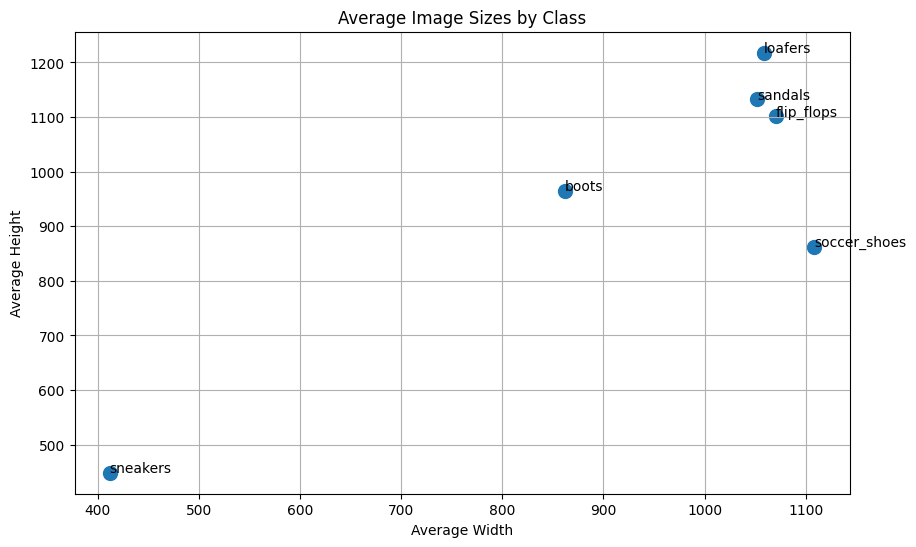

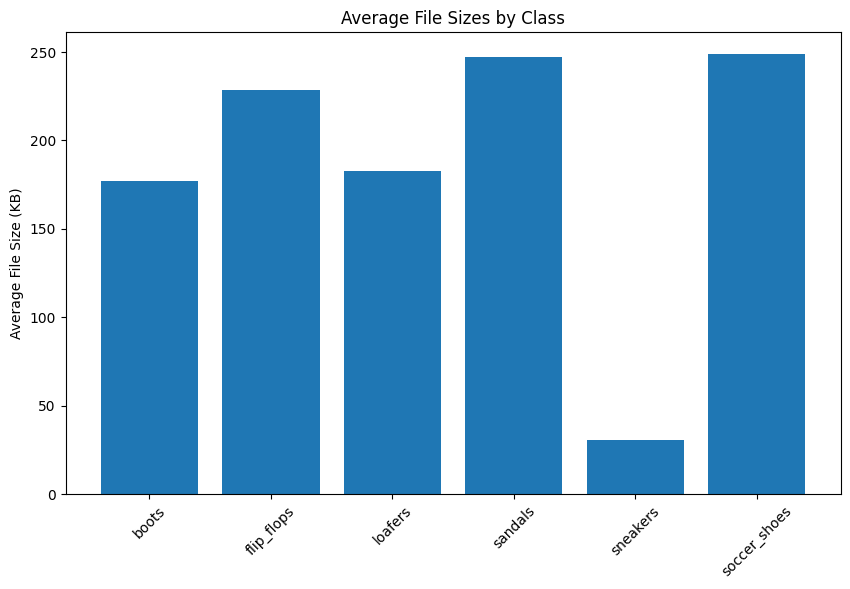

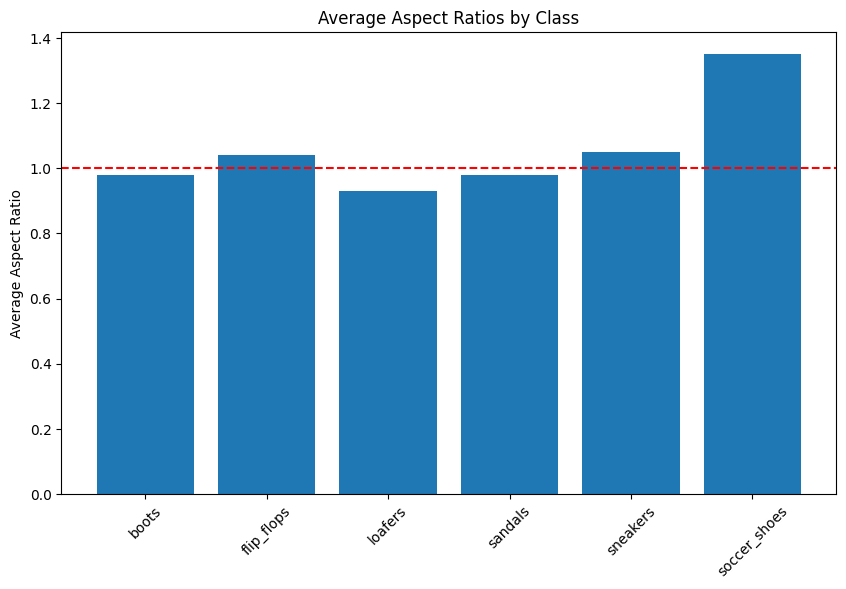

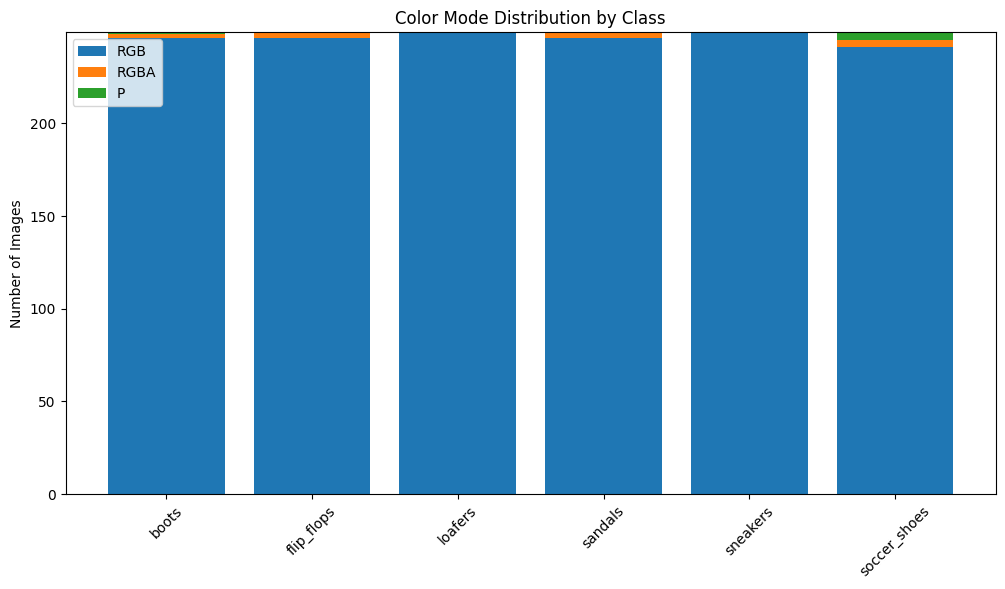

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
classes = ['boots', 'flip_flops', 'loafers', 'sandals', 'sneakers', 'soccer_shoes']
avg_sizes = np.array([
    [861.79, 964.86],
    [1070.66, 1101.3],
    [1058.34, 1217.7],
    [1052.26, 1132.16],
    [412.05, 448.74],
    [1108.45, 862.63]
])
avg_file_sizes = [177.17, 228.52, 182.83, 246.97, 30.49, 248.74]
avg_aspect_ratios = [0.98, 1.04, 0.93, 0.98, 1.05, 1.35]

# 1. Average Image Sizes
plt.figure(figsize=(10, 6))
plt.scatter(avg_sizes[:, 0], avg_sizes[:, 1], s=100)
for i, cls in enumerate(classes):
    plt.annotate(cls, (avg_sizes[i, 0], avg_sizes[i, 1]))
plt.xlabel('Average Width')
plt.ylabel('Average Height')
plt.title('Average Image Sizes by Class')
plt.grid(True)
plt.show()

# 2. Average File Sizes
plt.figure(figsize=(10, 6))
plt.bar(classes, avg_file_sizes)
plt.ylabel('Average File Size (KB)')
plt.title('Average File Sizes by Class')
plt.xticks(rotation=45)
plt.show()

# 3. Average Aspect Ratios
plt.figure(figsize=(10, 6))
plt.bar(classes, avg_aspect_ratios)
plt.ylabel('Average Aspect Ratio')
plt.title('Average Aspect Ratios by Class')
plt.xticks(rotation=45)
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

# 4. Color Mode Distribution
color_modes = {
    'boots': {'RGB': 246, 'P': 1, 'RGBA': 2},
    'flip_flops': {'RGB': 246, 'RGBA': 3},
    'loafers': {'RGB': 249},
    'sandals': {'RGB': 246, 'RGBA': 3},
    'sneakers': {'RGB': 249},
    'soccer_shoes': {'RGB': 241, 'RGBA': 4, 'P': 4}
}

plt.figure(figsize=(12, 6))
bottom = np.zeros(6)
for mode in ['RGB', 'RGBA', 'P']:
    values = [color_modes[cls].get(mode, 0) for cls in classes]
    plt.bar(classes, values, bottom=bottom, label=mode)
    bottom += values
plt.ylabel('Number of Images')
plt.title('Color Mode Distribution by Class')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [63]:
from PIL import Image
import face_recognition
import numpy as np

def detect_face(image_path):
    # Open the image using PIL
    with Image.open(image_path) as img:
        # Convert to RGB if necessary
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        # Convert PIL image to numpy array
        rgb_image = np.array(img)
    
    # Detect faces in the image
    face_locations = face_recognition.face_locations(rgb_image)
    
    # Check if any faces were detected
    return len(face_locations) > 0

# Example usage
image_path = "C:\\dataset\\shoeTypeClassifierDataset\\training\\boots\\image12.jpeg"
try:
    has_face = detect_face(image_path)
    if has_face:
        print("A human face was detected in the image.")
    else:
        print("No human face was detected in the image.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

No human face was detected in the image.


In [ ]:
##code to detect if there are faces present in an image for data cleaning

In [69]:
import os
import shutil
from PIL import Image
import face_recognition
import numpy as np

def detect_face(image_path):
    with Image.open(image_path) as img:
        if img.mode != 'RGB':
            img = img.convert('RGB')
        rgb_image = np.array(img)
    
    face_locations = face_recognition.face_locations(rgb_image)
    return len(face_locations) > 0

def move_images_with_faces(input_folder, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # List all files in the input folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            input_path = os.path.join(input_folder, filename)
            
            try:
                if detect_face(input_path):
                    # Move the image to the output folder
                    output_path = os.path.join(output_folder, filename)
                    shutil.move(input_path, output_path)
                    print(f"Moved {filename} to {output_folder}")
                else:
                    print(f"No face detected in {filename}")
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")

# Example usage
input_folder = "C:\\dataset\\shoeTypeClassifierDataset\\training\\soccer_shoes"
output_folder = "C:\\dataset\\shoeTypeClassifierDataset\\training\\soccer_shoes_with_faces"

move_images_with_faces(input_folder, output_folder)

No face detected in image1.jpg
No face detected in image10.jpeg
No face detected in image100.jpeg
No face detected in image101.jpeg
No face detected in image102.jpeg
No face detected in image103.jpeg
Moved image104.jpeg to C:\dataset\shoeTypeClassifierDataset\training\soccer_shoes_with_faces
No face detected in image105.jpeg
No face detected in image106.jpeg
Moved image107.jpeg to C:\dataset\shoeTypeClassifierDataset\training\soccer_shoes_with_faces
Moved image108.jpeg to C:\dataset\shoeTypeClassifierDataset\training\soccer_shoes_with_faces
No face detected in image109.jpeg
No face detected in image11.jpeg
No face detected in image110.jpeg
No face detected in image111.jpeg
No face detected in image112.jpg
No face detected in image113.jpeg
Moved image114.jpeg to C:\dataset\shoeTypeClassifierDataset\training\soccer_shoes_with_faces
No face detected in image115.jpeg
Moved image116.jpeg to C:\dataset\shoeTypeClassifierDataset\training\soccer_shoes_with_faces
No face detected in image117.jp

In [81]:
from PIL import Image
import os

def crop_image_keep_bottom(input_path, output_folder, keep_ratio=0.4):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Open the image
    with Image.open(input_path) as img:
        # Calculate the new dimensions
        width, height = img.size
        crop_height = int(height * keep_ratio)
        crop_start = height - crop_height

        # Crop the image
        cropped_img = img.crop((0, crop_start, width, height))

        # Generate the output path
        filename = os.path.basename(input_path)
        output_path = os.path.join(output_folder, filename)

        # Save the cropped image
        cropped_img.save(output_path)

    print(f"Cropped image (keeping bottom {keep_ratio*100}%) saved to: {output_path}")

# Example usage
input_image_path = "C:\\dataset\\shoeTypeClassifierDataset\\training\\boots_with_faces\\image115.jpeg"
output_folder = "C:\\dataset\\shoeTypeClassifierDataset\\training\\boots_resize"

crop_image_keep_bottom(input_image_path, output_folder)

Cropped image (keeping bottom 40.0%) saved to: C:\dataset\shoeTypeClassifierDataset\training\boots_resize\image115.jpeg


In [ ]:
## crop all images where human is present to capture just footwear

In [78]:
def process_folder(input_folder, output_folder, keep_ratio=0.4):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    print(f"Processing folder: {input_folder}")
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
        print(f"Checking file: {input_path}")
        
        if os.path.isfile(input_path) and is_image(input_path):
            output_path = os.path.join(output_folder, filename)
            
            try:
                crop_image_keep_bottom(input_path, output_path, keep_ratio)
                print(f"Processed: {filename}")
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
        else:
            print(f"Skipped: {filename} (not an image file)")
# Example usage
input_folder = r"C:\dataset\shoeTypeClassifierDataset\training\boots_with_faces"
output_folder = r"C:\dataset\shoeTypeClassifierDataset\training\boots_resize"

process_folder(input_folder, output_folder)

Processing folder: C:\dataset\shoeTypeClassifierDataset\training\boots_with_faces
Checking file: C:\dataset\shoeTypeClassifierDataset\training\boots_with_faces\image100.jpeg
Processed: image100.jpeg
Checking file: C:\dataset\shoeTypeClassifierDataset\training\boots_with_faces\image102.jpeg
Processed: image102.jpeg
Checking file: C:\dataset\shoeTypeClassifierDataset\training\boots_with_faces\image103.jpeg
Processed: image103.jpeg
Checking file: C:\dataset\shoeTypeClassifierDataset\training\boots_with_faces\image104.jpeg
Processed: image104.jpeg
Checking file: C:\dataset\shoeTypeClassifierDataset\training\boots_with_faces\image105.jpeg
Processed: image105.jpeg
Checking file: C:\dataset\shoeTypeClassifierDataset\training\boots_with_faces\image106.jpeg
Processed: image106.jpeg
Checking file: C:\dataset\shoeTypeClassifierDataset\training\boots_with_faces\image107.jpeg
Processed: image107.jpeg
Checking file: C:\dataset\shoeTypeClassifierDataset\training\boots_with_faces\image110.jpeg
Process

In [85]:
from PIL import Image
import os
import imghdr

def crop_image_keep_bottom(input_path, output_path, keep_ratio=0.4):
    with Image.open(input_path) as img:
        width, height = img.size
        crop_height = int(height * keep_ratio)
        crop_start = height - crop_height
        cropped_img = img.crop((0, crop_start, width, height))
        cropped_img.save(output_path)

def is_image(file_path):
    return imghdr.what(file_path) is not None

def process_folder(input_folder, output_folder, keep_ratio=0.4):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
        
        if os.path.isfile(input_path) and is_image(input_path):
            output_path = os.path.join(output_folder, filename)
            
            try:
                crop_image_keep_bottom(input_path, output_path, keep_ratio)
                print(f"Processed: {filename}")
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
        else:
            print(f"Skipped: {filename} (not an image file)")

# Example usage
input_folder = r"C:\dataset\shoeTypeClassifierDataset\training\soccer_shoes_with_faces"
output_folder = r"C:\dataset\shoeTypeClassifierDataset\training\soccer_shoes_resize"


process_folder(input_folder, output_folder)

Skipped: image104.jpeg (not an image file)
Processed: image107.jpeg
Processed: image108.jpeg
Processed: image114.jpeg
Processed: image116.jpeg
Processed: image123.jpeg
Processed: image132.jpeg
Processed: image18.jpeg
Processed: image217.jpeg
Processed: image22.jpeg
Processed: image27.jpeg
Processed: image32.jpeg
Processed: image34.jpeg
Processed: image36.jpeg
Processed: image39.jpeg
Processed: image40.jpeg
Processed: image45.jpeg
Processed: image48.jpeg
Processed: image53.jpeg
Processed: image56.jpeg
Processed: image58.jpeg
Processed: image65.jpeg
Processed: image70.jpeg
Processed: image71.jpeg
Processed: image73.jpeg
Processed: image91.jpeg


In [ ]:
### data augmentation

In [90]:
import os
from PIL import Image, ImageEnhance
import random

def augment_image(image):
    # Rotate
    if random.random() > 0.5:
        angle = random.randint(-30, 30)
        image = image.rotate(angle)
    
    # Flip
    if random.random() > 0.5:
        image = image.transpose(Image.FLIP_LEFT_RIGHT)
    
    # Adjust brightness
    if random.random() > 0.5:
        factor = random.uniform(0.5, 1.5)
        enhancer = ImageEnhance.Brightness(image)
        image = enhancer.enhance(factor)
    
    # Adjust contrast
    if random.random() > 0.5:
        factor = random.uniform(0.5, 1.5)
        enhancer = ImageEnhance.Contrast(image)
        image = enhancer.enhance(factor)
    
    return image

# Directory containing class folders
base_dir = 'C:\\dataset\\shoeTypeClassifierDataset\\training'

# Number of augmented images to generate per original image
num_aug_per_image = 3

for class_folder in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_folder)
    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(class_path, image_file)
                print(image_path)
                try:
                    with Image.open(image_path) as img:
                        for i in range(num_aug_per_image):
                            augmented = augment_image(img)
                            aug_image_path = os.path.join(class_path, f'aug_{i}_{image_file}')
                            augmented.save(aug_image_path)
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")

print("Augmentation complete!")

C:\dataset\shoeTypeClassifierDataset\training\boots\aug_0_image1.jpg
C:\dataset\shoeTypeClassifierDataset\training\boots\aug_0_image10.jpg
C:\dataset\shoeTypeClassifierDataset\training\boots\aug_0_image100.jpeg
C:\dataset\shoeTypeClassifierDataset\training\boots\aug_0_image101.jpg
C:\dataset\shoeTypeClassifierDataset\training\boots\aug_0_image102.jpeg
C:\dataset\shoeTypeClassifierDataset\training\boots\aug_0_image103.jpeg
C:\dataset\shoeTypeClassifierDataset\training\boots\aug_0_image104.jpeg
C:\dataset\shoeTypeClassifierDataset\training\boots\aug_0_image105.jpeg
C:\dataset\shoeTypeClassifierDataset\training\boots\aug_0_image106.jpeg
C:\dataset\shoeTypeClassifierDataset\training\boots\aug_0_image107.jpeg
C:\dataset\shoeTypeClassifierDataset\training\boots\aug_0_image108.jpeg
C:\dataset\shoeTypeClassifierDataset\training\boots\aug_0_image109.jpeg
C:\dataset\shoeTypeClassifierDataset\training\boots\aug_0_image11.jpeg
C:\dataset\shoeTypeClassifierDataset\training\boots\aug_0_image110.jpeg